In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import warnings


In [2]:
df=pd.read_csv('/content/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,Skinthickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,Skinthickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df_check=df.isnull().sum()
print(df_check)

Pregnancies                 0
Glucose                     0
BloodPressure               0
Skinthickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [8]:
X = pd.DataFrame(df, columns=['Glucose','BloodPressure','Skinthickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
Y = df.Outcome.values.reshape(-1,1)
X

,Glucose,BloodPressure,Skinthickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25, random_state=1)

In [11]:
clf = DecisionTreeClassifier(max_depth=3)
clf= clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)

In [12]:
print('Accuracy:', metrics.accuracy_score(Y_test,Y_pred))

Accuracy: 0.7708333333333334


In [13]:
from sklearn import tree

In [14]:
text_representation = tree.export_text (clf)
print (text_representation)

|--- feature_0 <= 129.50
|   |--- feature_6 <= 28.50
|   |   |--- feature_4 <= 45.40
|   |   |   |--- class: 0
|   |   |--- feature_4 >  45.40
|   |   |   |--- class: 1
|   |--- feature_6 >  28.50
|   |   |--- feature_4 <= 26.20
|   |   |   |--- class: 0
|   |   |--- feature_4 >  26.20
|   |   |   |--- class: 0
|--- feature_0 >  129.50
|   |--- feature_4 <= 29.95
|   |   |--- feature_0 <= 145.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  145.50
|   |   |   |--- class: 1
|   |--- feature_4 >  29.95
|   |   |--- feature_0 <= 154.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  154.50
|   |   |   |--- class: 1



In [15]:
with open ("description_tree.log", "w") as fout:
    fout.write(text_representation)

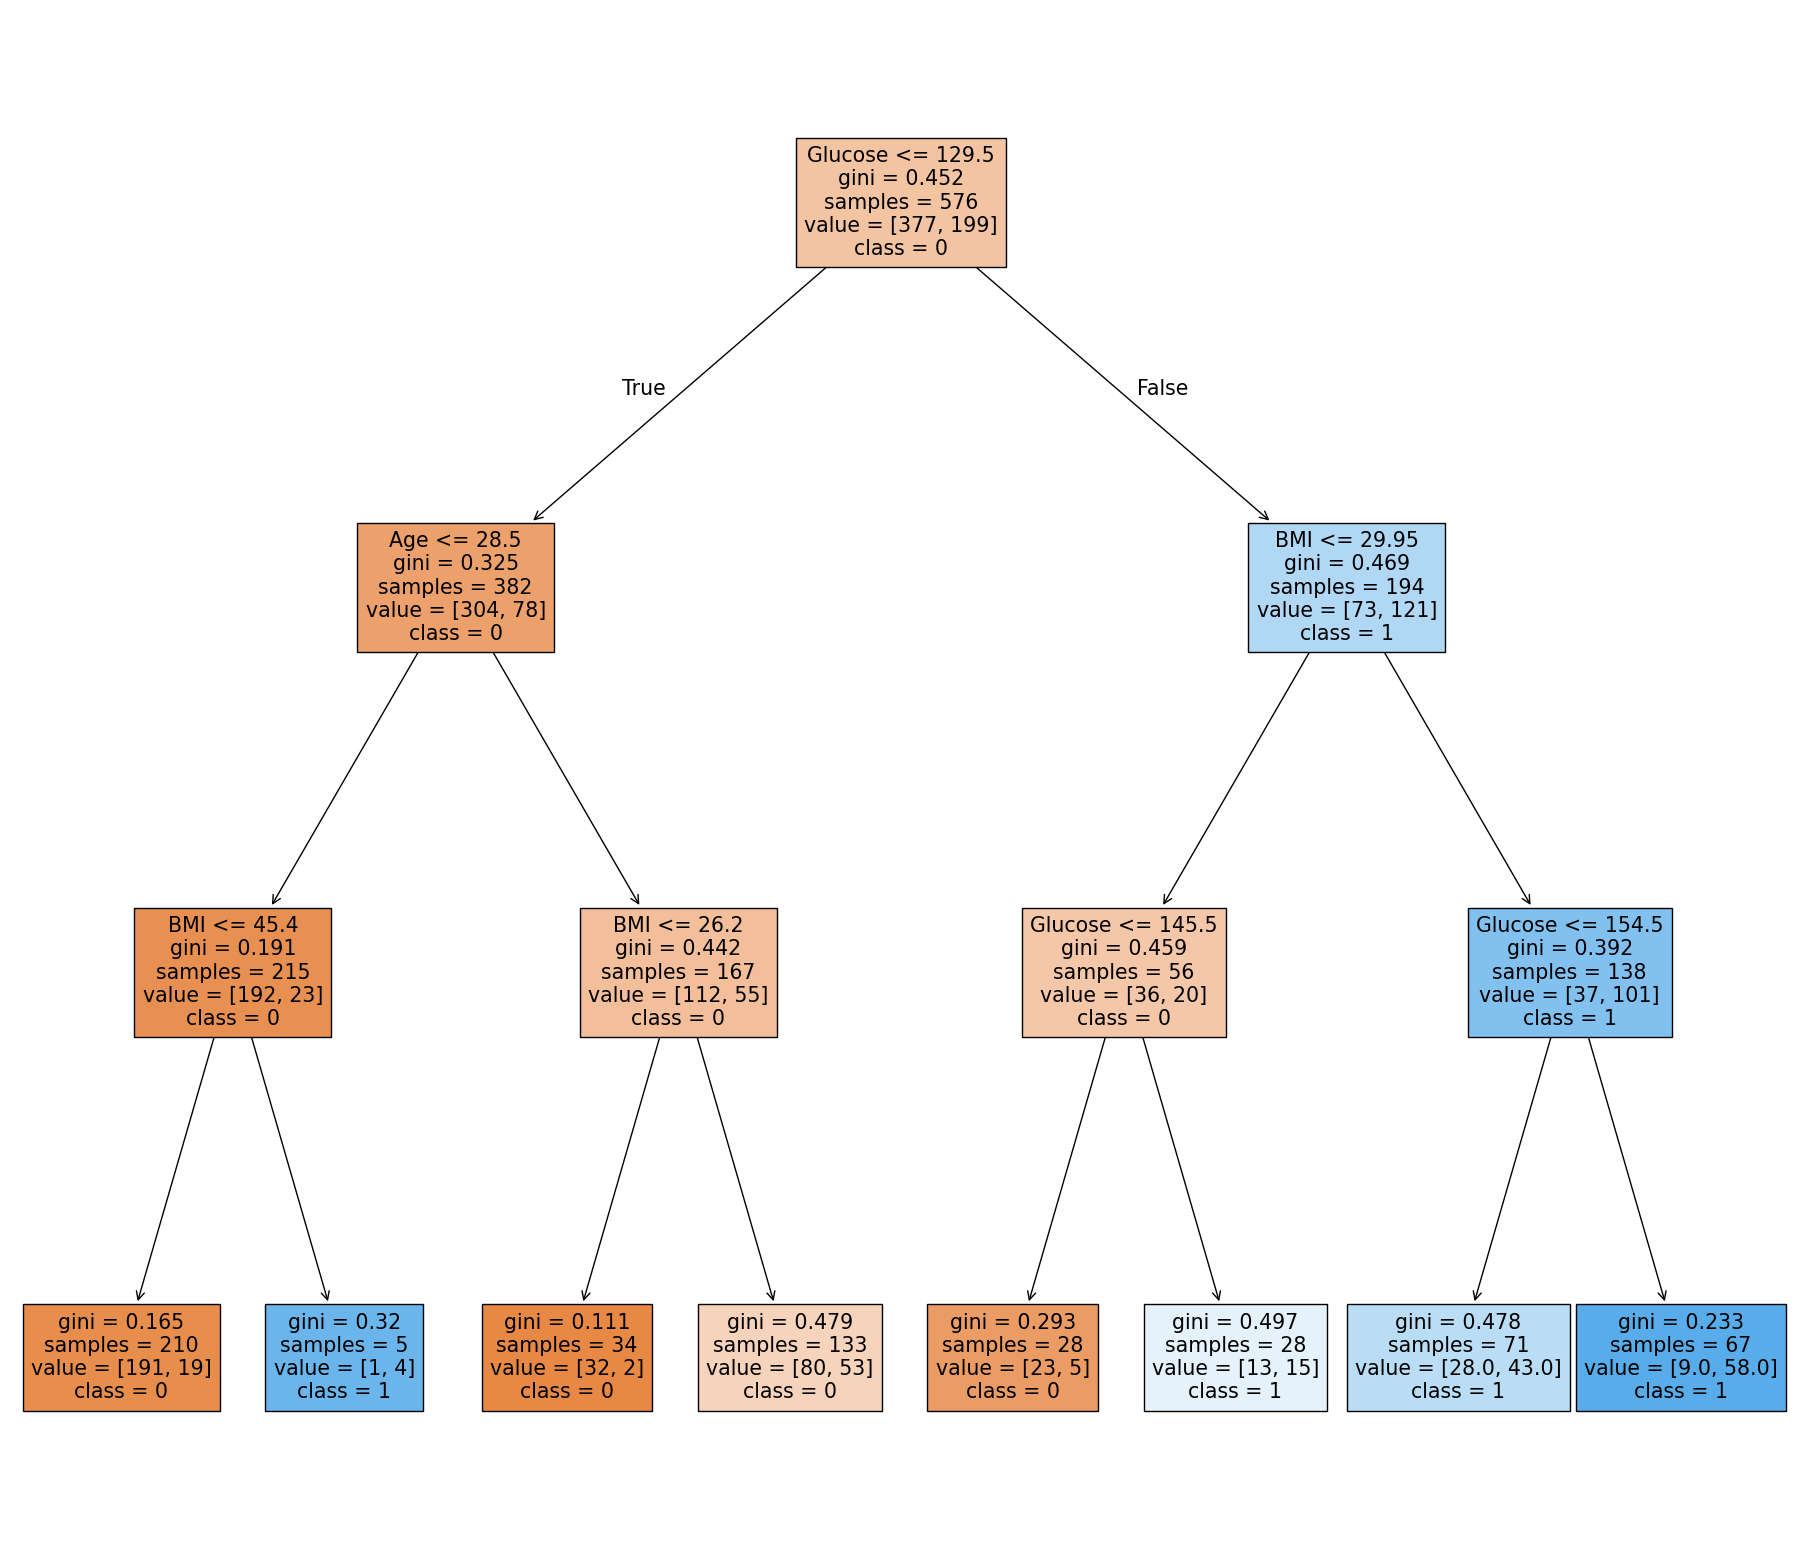

In [16]:
feature_names = ['Glucose','BloodPressure','Skinthickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
target_names = ['0', '1']
fig= plt.figure(figsize=(23,20))
Plot = tree.plot_tree(clf,
                      feature_names= feature_names,
                      class_names = target_names,
                      filled = True)
fig.savefig('Tree1.png')